[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuenfgeld/2022TeamBDataEngineeringBC/blob/main/Presentation/Pr%C3%A4sentation%20SQLite.ipynb)

In [ ]:
#imports 
import sqlite3
import pandas as pd

In [ ]:
#get from Git
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

In [ ]:
#connect to DB
conn = sqlite3.connect('sqlite_example.db')
cursor = conn.cursor()
print("Opened database successfully");

In [ ]:
#Delete Tables in case they exist
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")

In [ ]:
#load CSVs
food = pd.read_csv('tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('tables/initial_tables/Customer_buys_Food.csv', sep=";")

In [ ]:
#Create Tables
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int NOT NULL UNIQUE,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int ,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

In [ ]:
#Insert into table
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

<h1> Herzlich Willkomen zur Präsentation des SQLite Teams! </h1>

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/sqlite-and-python.png>

Quelle: https://charlesleifer.com/blog/extending-sqlite-with-python/

<h1>Inhalt</h1>

1. Teil 1
  1. Einführung
  2. ER - Diagramme
  3. Meta-Informationen (PRGAMA)
2. Teil 2
  1. Einführung SQL Lite
  2. SQLite Subqueries
  3. OLAP vs. OLTP
3. Teil 3
  1. Sternschema
  2. Transformation in das Sternschema
  3. Joinabfrage
  4. Abschluss


<h1> Einführung </h1>

Wir sind eine Firma, welche Daten für Unternehmen auswertet. Eine Tierhandlung hat uns Zugriff auf ihre Datenbank gegeben, um Analysen über die Verkäufe durchzuführen. Leider hat die IT-Abteilung vergessen uns mitzuteilen wie die Datenbank aufgebaut ist.


<h1> Was ist ein ER-Diagramm? </h1>


<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/er_basics.png>

ER-Diagramme werden genutzt, um die Struktur einer Datenbank darzustellen. Sie geben Auskunft über die in der Datenbank vorhandenen Tabellen, die Attribute (Spalten) der Tabelle sowie die zusammenhänge einzelner Tabellen. 

<h1> Mithilfe der Meta-Informationen die Struktur herausfinden </h1>

Die Meta-Informationen erlauben uns die Zusammenhänge der Tabellen genauer unter die Lupe zu nehmen. Mithilfe der Meta-Informationen ist es uns möglich herauszufinden, welches Attribut je Tabelle als Primary Key dient (also nur einmal vorkommen darf und eindeutig ist) und welche Attribute Foreign Keys, also Referenzen auf andere Tabellen sind.

### Alle Tabellennamen in der Datenbank auslesen

Damit die Meta-Informationen ausgeleses werden können werden PRAGMA-Funktionen benötigt. Damit man diese Funktionen anwenden kann, müssen die Namen der in der Datenbank vorhandenen Tabellen bekannt sein. Die folgende Codezeile gibt uns die Namen der Tabellen zurück.

In [ ]:
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))

Um ein ER-Diagramm zu erstellen, kann nun schonmal ein Rechteck um die einzelnen Tabellennamen gezeichnet werden.

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/only_tables.png>

### Private Keys und Tabellenspalten auslesen

Die PRAGMA-Funktion "table_info" liefert den Primary Key der Tabelle, sowie alle Attribute. Dieser Befehl muss für jede einzelne Tabelle in der Datenbank ausgeführt werden. Im folgenden Codeblock ist zu sehen, wie der Befehl ausgeführt wird.

In [ ]:
print(pd.read_sql_query("PRAGMA table_info('orders')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

In [ ]:
print(pd.read_sql_query("PRAGMA table_info('customer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('customer_buys_food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('employee')", conn))

Das ER-Diagramm kann nun um die neu gewonnenen Informationen erweitert werden. Jedes Attribut wird oval eingekreist und mit dem Rechteck der Tabelle verbunden. Primary Keys werden unterstrichen.


<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/tabellen_spalten.png>

Zuletzt werden die Foreign Keys benötigt, um Rückschlüsse über die Beziehungen der einzelnen Tabellen ziehen zu können. Hierfür wird die PRAGMA-Funktion foreign_key_list genutzt.

### Foreign Keys auslesen

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('orders')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('Animals')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer_buys_food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('employee')", conn))

Liefert der Befehl ein "empty Dataframe" zurück, sind in der entsprechenden Tabelle keine Foreign Keys hinterlegt. Wir sehen jedoch, dass die Tabelle *animals* einen Foreign Key auf die Tabelle *food* enthält. Die Verbindung besteht vom Attribut *food* zum Attribut *food_ID* der Tabelle *food*. Das bedeutet, dass es sich um eine 1 zu 1 Beziehung zwischen *animals* und *food* handelt. Wir können nun eine Raute zwischen den Tabellen zeichnen und uns einen Begriff überlegen, welcher die Beziehung beschreibt. In diesem Fall wird "eat" gewählt, denn ein Tier isst, laut der Datenbank, immer eine Art Futter.

Die zweite Erkenntnis, die uns die PRAGMA-Funktion liefert ist etwas komplizierter. Wir können erkennen, dass die Tabelle *customer_buys_food* fast ausschließlich aus Foreign Keys besteht. Eine Tabelle, die hauptsächlich aus Foreign Keys besteht, ist ein Indiz dafür, dass es sich um eine Tabelle handelt, welche eine N zu M Beziehung beschreibt. In diesem Fall also: mehrere Customer können mehrere Arten Futter kaufen. Wir verbinden also die *customer* und die *food* Tabelle mit einer Raute "buys". Die zusätlichen Attribute der *customer_buys_food* Tabelle werden als Attribute an die "buys" Raute angehängt.

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/nur_tabellen.draw_io.drawio_3.png>

<h1>Übung 1</h1>

### Klicke auf den "*Open in Colab*" Button um die Übung durchzuführen.
#### Aufgabe 1.1: Nutze PRAGMA-Funktionen, um die Tabellen, Attribute, Primary Keys und Foreign Keys der Datenbank herauszufinden.
#### Aufgabe 1.2: Zeichne mit den gewonnen Informationen ein ER-Diagramm der Datenbank.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuenfgeld/2022TeamBDataEngineeringBC/blob/main/Uebungen/Uebungen/Uebungen%20zu%20Teil%201.ipynb)

# Zusammenfassung
1. print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))
2. print(pd.read_sql_query("PRAGMA table_info('TABELLENNAME')", conn))
3. print(pd.read_sql_query("PRAGMA foreign_key_list("TABELLENNAME")", conn))

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/er_basics.png>

<h1> Teil 2 </h1>

<h2> Einführung in SQL Lite </h2> 

SQL (Structured Query Language) ist eine Standardsprache, um Daten in Datenbanken zu speichern, zu bearbeiten und abzufragen. Weiterführende Informationen sind unter folgendem [Link](https://www.w3schools.com/sql/) zu finden.


<h4> SELECT </h4>

Das Schlüsselwort SELECT wird benutzt, um Daten aus einer Tabelle auszuwählen. Nach dem SELECT Ausdruck werden die Namen der Spalten aufgelistet, die ausgegeben werden sollen. Wird an diese Stelle ein * geschrieben, werden alle in der Tabelle enthaltenen Stalten zurückgegeben. Der Name der zu durchsuchenden Tabelle wird hinter des Schlüsselwort FROM geschrieben. Die Abfrage wird mit einem Semikolon abgeschlossen. <br>
<br>
Wenn *column1* und *column2* die gesuchte Spalten von *table_name* sind, dann sieht die Abfrage folgendermaßen aus:<br>
<br>
    SELECT *column1*, *column2*, ...<br>
    FROM *table_name*;

Beispiel SELECT: <br>
Hier werden die Spalten *customer_ID* und *name* aus der Tabelle *customer* ausgegeben.


In [ ]:
print(pd.read_sql_query('''
    SELECT customer_ID, name
    FROM customer
        ''', conn))

<h4> WHERE </h4>

Das Schlüsselwort WHERE kann zur gefiltereten Abfrage verwendet werden. Hinter den WHERE Ausdruck wird eine Bedingung geschrieben. Nur die Daten, die diese Bedingung erfüllen werden zurückgegeben.<br>
<br>
Wenn die Werte aus den Spalten *column1* und *column2* der Tabelle *table_name* gesucht werden, auf die die Bedingung *condition* zutrifft, dann sieht die Abfrage folgendermaßen aus:<br>
<br>
    SELECT column1, column2, ...<br>
    FROM table_name<br>
    WHERE condition;<br>
<br>
Bedingungen zur Filterung können mit den Operatoren AND, OR und NOT kombiniert werden.

Beispiel WHERE: <br>
Hier werden *employee_ID* und *name* der Verkäufer aus der Tabelle *employee* ausgegeben, die über 2000 verdienen.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name
    FROM employee
    WHERE wage > 2000;
        ''', conn))

<h4> JOIN </h4>

Mit dem Schlüsselwort JOIN lassen sich Tabellenreihen mehrerer Tabellen, die über eine Spalte miteinander verknüpft sind, kombinieren. Über den ON Ausdruck wird die Verknüfung der Tabellen festgelegt.<br>
<br>
In SQLite gibt es unterschiedliche Arten von JOINs: <br>
<br>
1. __INNER JOIN__ <br>
Bei INNER JOIN werden die Reihen gewählt, die in in beiden Tabellen vorkommen.<br> 
<br>  
Wenn die Werte aus den Spalten *column1* und *column2* gesucht werden, die sowohl in Tabelle *table_name1* und Tabelle *table_name2* (welche über *keyfield1* und *keyfield2* verknüpft sind) vorkommen, sieht die Abfrage folgendermaßen aus:<br>
<br>
    SELECT column1, column2, ...<br>
    FROM table_name1<br>
    INNER JOIN table_name2<br>
    ON table_name1.keyfield1 = table_name2.keyfield2;<br>
<br>
2. __LEFT (OUTER) JOIN__ <br>
Bei LEFT JOIN werden alle Reihen der ersten Tabelle und die übereinstimmenden Reihen der zweiten Tabelle zurückgegeben.<br>
Bei LEFT OUTER JOIN werden alle Reihen der ersten Tabelle zurückgegeben, die nicht auch in der zweiten Tabelle enthalten sind.<br> <br> 
3. __CROSS JOIN__ <br>
Bei CROSS JOIN ohne WHERE Bedingung wird jede Reihe der ersten Tabelle mit jeder Reihe der zweiten Tabelle verbunden. Die Reihenanzahl der Ergebnis-Tabelle ist das Produkt der Reihenanzahl der ersten und der zweiten Tabelle.<br> 
<br> 
4. __NATURAL JOIN__ <br>
NATURAL JOIN wird ohne ON Ausdruck eingesetzt. Hierbei werden zwei Tabellen anhand gleicher Spaltenname miteinander verknüpft.<br> <br>
Wenn die Werte aus den Spalten *column1* und *column2* verknüpft werden sollen, die sowohl in Tabelle *table_name1* und Tabelle *table_name2* enthalten und in ihren jeweilgen Tabellen den gleichen Spaltenname haben, sieht die Abfrage folgendermaßen aus:<br> <br>
    SELECT column1, column2, ...<br>
    FROM table_name1<br>
    NATURAL JOIN table_name2;<br>

Beispiel INNER JOIN: <br>
Hier werden *employee_ID* und *name* der Verkäufer aus der Tabelle *employee* ausgegeben, deren *employee_ID* auch in der Tabelle *customer_buys_food* enthalten sind.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name
    FROM employee
    INNER JOIN customer_buys_food
        ON employee.employee_ID = customer_buys_food.E_ID;
        ''', conn))

<h4> GROUP BY </h4>

Das Schlüsselwort GROUP BY wird eingesetzt, um Reihen zu gruppieren, bei denen die gleiche Bedingung zutrifft. Der Audruck GROUP BY wird oft in Verbindung mit folgenen Aggregatsfunktionen eingesetzt: COUNT(), MAX(), MIN(), SUM(), AVG(). Aggregatsfunktionen werden auf die Spalten, die nach dem SELECT Ausdruck stehen angewandt.<br>
<br>
Um die Anzahl der Daten in der Spalte *column1* der Tabelle *table_name* zu zählen und das Ergebnis über Reihenwerte von *column2* zu gruppieren wird folgende Abfrage benötigt:<br>
<br>
    SELECT column1<br>
    FROM table_name<br>
    GROUP BY column2;<br>

Beispiel GROUP BY: <br>
Hier werden *employee_ID* und *name* der Verkäufer aus der Tabelle *employee* ausgegeben, deren *employee_ID* auch in der Tabelle *customer_buys_food* enthalten sind. Anschließend werden die einzelnen IDs der Spalte *employee_ID* gruppiert.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name
    FROM employee
    INNER JOIN customer_buys_food
        ON employee.employee_ID = customer_buys_food.E_ID
    GROUP BY employee_ID;
        ''', conn))

<h4> ORDER BY </h4>

Das Schlüsselwort ORDER BY wird eingesetzt, um die Ausgabe einer Abfrage in auf- oder absteigender Reihenfolge zu sortieren. Hinter den Audruck ORDER BY wird der/die Spaltenname(n) geschrieben, nach denen sortiert werden soll. Standardmäßig wird nach aufsteigender Reihenfolge sortiert. Für eine absteigende Sortierung muss das Schlüsselwort DESC eingesetzt werden.<br>
<br>
Wenn die Werte aus den Spalten *column1* und *column2* der Tabelle *table_name* gesucht werden und in absteigender Reihenfolge der Spalte *column1* ausgegeben werden sollen, dann sieht die Abfrage folgendermaßen aus:<br>
<br>
    SELECT column1, column2, ...<br>
    FROM table_name<br>
    ORDER BY column1 DESC;<br>


Beispiel ORDER BY: <br>
Hier werden die Inhalte der Spalten *employee_ID*, *name* und *wage* der Verkäufer aus der Tabelle *employee* nach deren individuellen Gehältern absteigend sortiert.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name, wage
    FROM employee
    ORDER BY wage DESC;
        ''', conn))

<h2> Subqueries </h2>

In SQLite wird eine SQL Abfrage, die in einer größeren Abfrage verschachtelt ist als Subquery bezeichnet. Subquerys können im Zusammenhang mit den Schlüsselwörtern SELECT, FROM oder WHERE eingesetzt werden. Die beiden Abfragen werden als innere und äußere Abfrage bezeichnet. Die innere Abfrage wird zuerst ausgeführt und ihr Ergebnis beeinflusst die äußere Abfrage. Die innere Abfrage wird mit Klammern *( )* abgegrenzt und ist hier in rot gekennzeichnet:<br>
<br>
SELECT column_1<br>
FROM table_1<br>
WHERE column_1 = (<br>
<font color=red><blockquote>SELECT column_2 <br> FROM table_2</font>
);


<h4> Scalar Subquery </h4>

Liefert die innere Abfrage einen einzigen Wert zurück, wird sie als skalare Subquery bezeichnet. Der Rückgabewert kann über ein *'='* zugeordnet werden. Liefert die innere Abfrage *null*, dann gibt die Äußere Abfrage keine Spalten zurück.<br>
<br>
Beispiel:<br>
Die Abfrage liefert die Kunden-ID der Kunden, die Hundefutter gekauft haben. Die innere Abfrage liefert einen einzigen Wert zurück, nämlich die *food_ID*, welche zu *Hundefutter* gehört.

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID
    FROM customer_buys_food
    WHERE F_ID = (
        SELECT food_ID 
        FROM food
        WHERE name = 'Hundefutter'
        )''', conn))

Die Suquery kann in Zusammenhang mit Vergleichsoperatoren wie =, ==, <, >, >=, <=, <>, != und Aggregatsfunktionen eingesetzt werden.<br>
<br>
Beispiel:<br>
Die Abfrage liefert *employee_ID*, *name* und *wage* der Verkäufer zurück, die über dem Durchschnittsgehalt verdienen.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name, wage, gender
    FROM employee
    WHERE wage > (
        SELECT AVG(wage) 
        FROM employee
        );''', conn))

<h4> IN / NOT IN Operator </h4>

Liefert die innere Abfrage mehrere Rückgabewerte, dann muss der IN oder der NOT IN Operator verwendet werden.<br>
<br>
Beispiel:
Die Abfrage liefert die Kunden-ID der Kunden, die Futter aus Deutschland gekauft haben. Die innere Abfrage liefert die *food_ID*s, die zu Futter gehören, das in Deutschland hergestellt wurde.

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID 
    FROM customer_buys_food
    WHERE F_ID IN
       (SELECT food_ID 
       FROM food 
       WHERE origin == 'Deutschland')
    ''', conn))

<h4> EXISTS / NOT EXISTS Operator </h4>

Um zu prüfen, ob bestimmte Zeilen in in einer Tabelle enthalten sind, kann der EXISTS bzw. der NOT EXISTS Operator eingesetzt werden.<br>
<br>
Beispiel:<br>
Die Abfrage liefert *employee_ID* und *name* der Verkäufer zurück, deren *employee_ID* nicht in der Tabelle *customer_buys_food* auftaucht. Damit kann untersucht werden, welcher Verkäufer bisher nichts verkauft hat.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name
    FROM employee
    WHERE NOT EXISTS (
        SELECT *
        FROM customer_buys_food
        WHERE E_ID = employee.employee_ID
        );
    ''', conn))

<h4> Subqueries & FROM Operator </h4>

Subqueries können auch im FROM Abschnitt eingesetzt werden. Wichtig hierbei ist, dass jede Tabelle, die von einer Subquery innerhalb des FROM Abschnitts zurückliefert wird, einen Namen haben muss. Die Namensdefinition erfolgt über den AS Operator.<br><br>
Beispiel:<br>
Die innere Abfrage liefert eine Tabelle zurück, die den Inhalt der Spalten *employee_ID*, *name* und *wage* der Tabelle *employee* enthält, der zu männlichen Verkäufern gehört. In der äußeren Abfrage wird die Filterung des Gehalts auf die Tabelle der inneren Abfrage angewandt.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name, wage 
    FROM (
        SELECT employee_ID, name, wage 
        FROM employee 
        WHERE gender == 'm')
        AS employee_male
    WHERE wage > 2000; 
    ''', conn))

<h1>Übung 2</h1>

### Klicke auf den "*Open in Colab*" Button um die Übung durchzuführen
#### Aufgabe 2.1: Finde heraus, welche Bestellungen von Verkäufern abgewickelt wurden, die mehr als 2000 verdienen.
#### Aufgabe 2.2: Finde heraus, welche Kunden Futter von weiblichen Verkäufern verkauft bekommen haben.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuenfgeld/2022TeamBDataEngineeringBC/blob/main/Uebungen/Uebungen/Uebungen%20zu%20Teil%202.ipynb) 

<h2> OLTP vs. OLAP </h2>
Bei OLTP und OLAP handelt es sich um zwei unterschiedliche Benutzungsparadikmen, wie Datenbanken in einem System verwendet werden können.

<h3>Einsatz</h3>

**OLTP**<br>
(Abk. für online transactional processing)<br>
OLTP Anwendungen kommen im aktiven Tagesgeschäft bei der Echtzeit-Transaktionsverarbeitung zum Einsatz.<br>
Zum Beispiel: Kunde bestellt im Online Shop, Kunde tätigt eine Überweisung.<br>
<br>
**OLAP**<br>
(Abk. für online analytical processing)<br>
Bei OLAP Anwendungen steht die Durchführung komplexer Analysen im Vordergrund (aggregieren, transformieren, auswerten). OLAP zählt neben Data Mining zu den Methoden der analytischen Informationssysteme. Die Zielgruppe ist hier das Management.

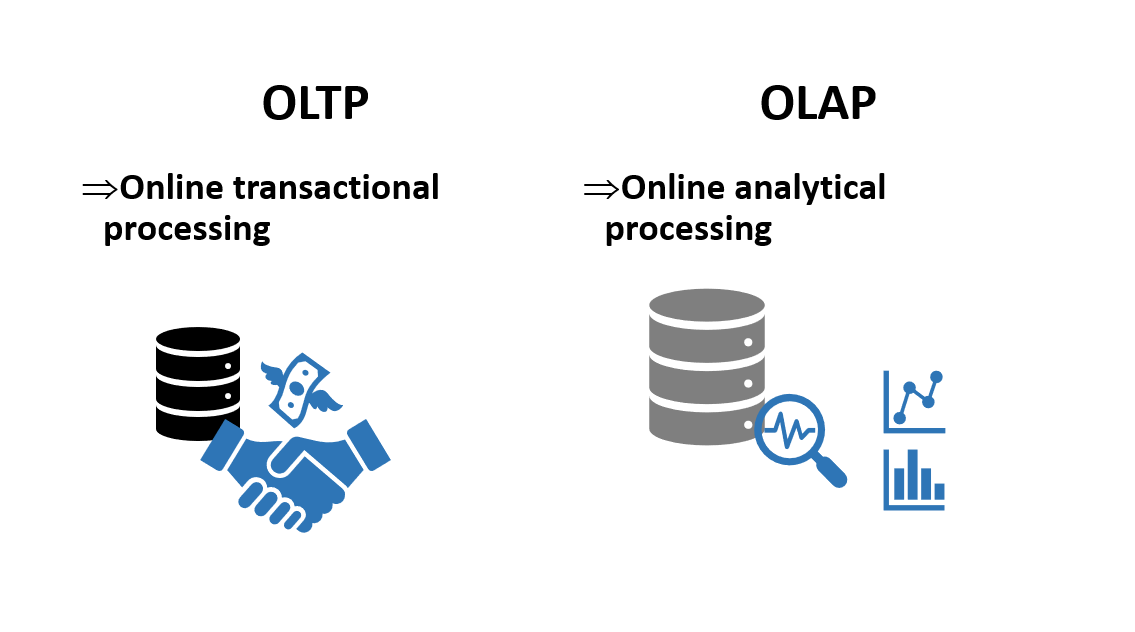

<h3>Anforderungen</h3>

**OLTP**<br>
OLTP Anwendungen sind unternehmenskritische Anwendungen, da moderne Unternehmen von der Exsistenz und Korrektheit ihrer Daten abhängig sind. Da OLTP Anwendungen ihr Einsatz bei Geschäftsvorgängen finden, soll die Transaktion möglichst schnell und effektiv ablaufen. Wichtig ist, dass ein paralleler Zugriff auf die Daten möglich ist. Hauptaugenmerk liegt auf der Transaktionssicherheit. Es darf zu keinem Datenverlust kommen und die Daten müssen zu jeden Zeitpunkt konsistent bleiben. Dabei helfen die Transaktionskriterien "ACID": atomicity, consistency, isolation, durability.<br>
<br>
**OLAP**<br>
Die Daten der OLAP Anwendungen sollten keinen Kontakt zu transaktionsorientierten Datenbeständen haben. Deshalb kommt hier oft ein Data Warehouse zum Einsatz. Bei OLAP Anwendungen liegt der Fokus darauf möglichst effektive und effiziente Auswertungen auf großen Datenmengen fahren zu können.

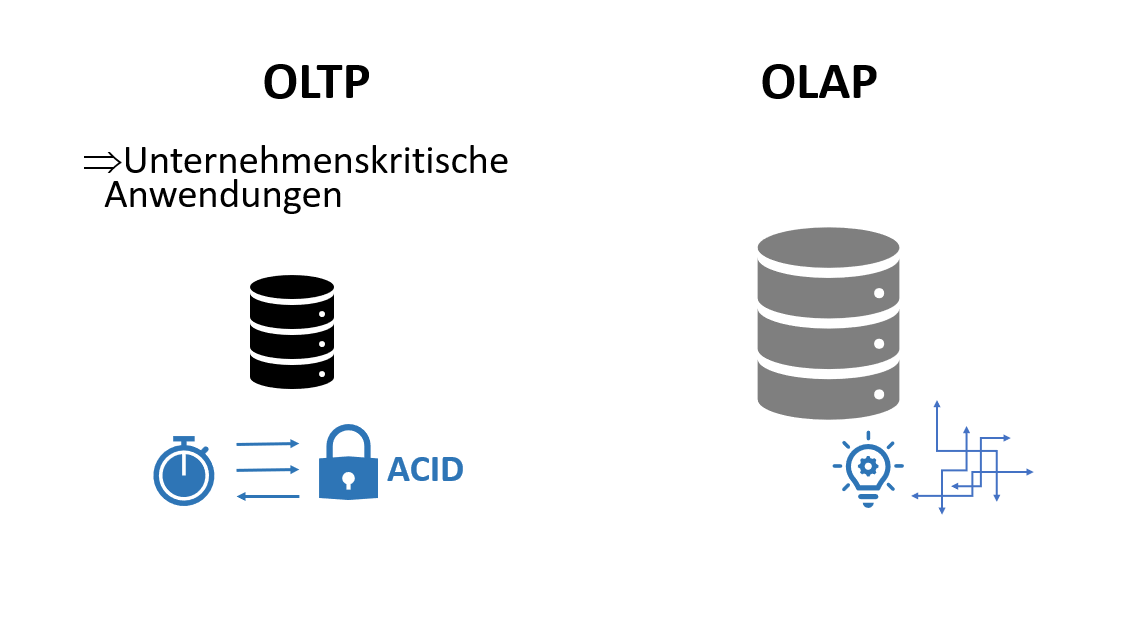

<h3>Datenstruktur</h3>

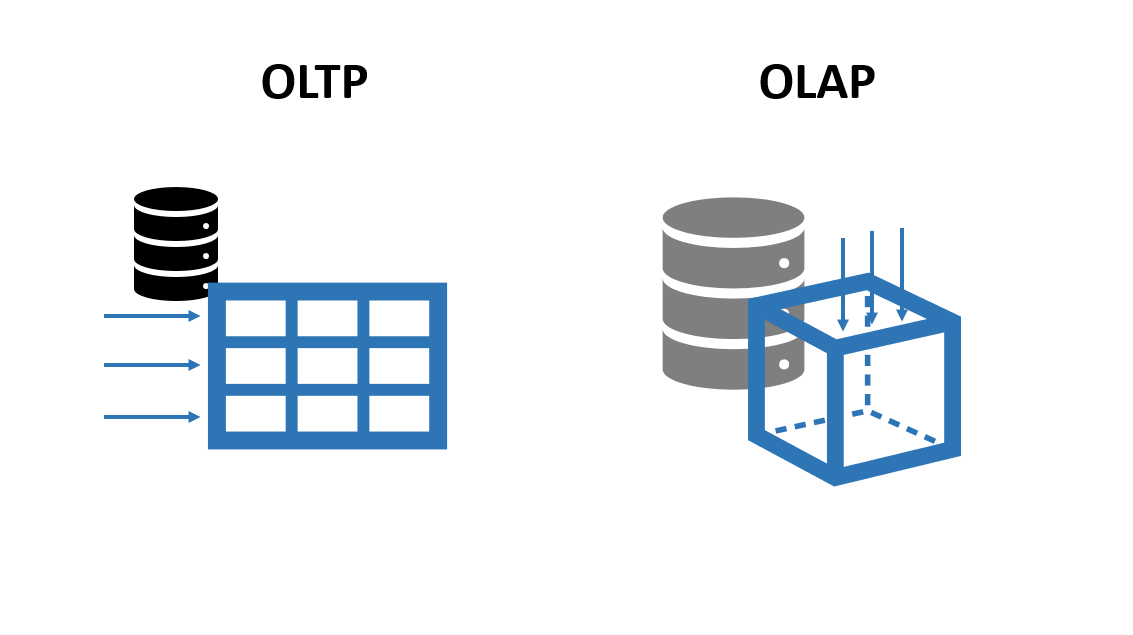

**OLTP**<br>
Bei OLTP Anwendungen werden meist nur simple Abfragen durchgeführt. Die Daten werden deshalb in einem zweidimensionalen Modell (Tabelle) in 3. Normalform abgespeichert. Dabei basiert das Modell auf einer zeilenorientierten Logik. Das erleichtert das Auslesen und Einfügen von einzelnen Transkationen.<br>
<br>
**OLAP**<br>
Da OLAP Anwendungen bei komplexen Abfragen zum Einsatz kommen wird hier eine mutidimensionale Datenstruktur zur Datenspeicherung gewählt. Das ganze wird als OLAP-Würfel bezeichnet. Bei OLAP Prozesse kommt hauptsächlich die spaltenorientiert Logik zum Einsatz. Für OLAP Anwendungen werden die Daten häufig im Sternschema angeordnet.

<h1> Teil 3 </h1>

<h3>Sternschema</h3>

Als Sternschema wird eine organisierte Datenstruktur bezeichnet, deren zugehörige Tabellen sternförmig angeordnet sind. Im Zentrum des Schemas gibt es eine einzige sog. Faktentabelle. Die zugehörigen Daten stehen in verknüpften sog. Dimensionstabellen. Jede Dimensionstabelle ist mit der Faktentabelle über einen foreign key verbunden. Das Sternschema wird in einem Data Warehouse und bei OLAP Anwendungen eingesetzt. Diese Anordnung kommt vor allem dann zum Einsatz, wenn viele Abfragen durchgeführt werden müssen. Sie minimiert die Verwendung von zeitintensiven Join-Abfragen. Anomalien (Redundanzen) und ein erhöhter Speicherbedarf werden deshalb aus Performancegründen in Kauf genommen.

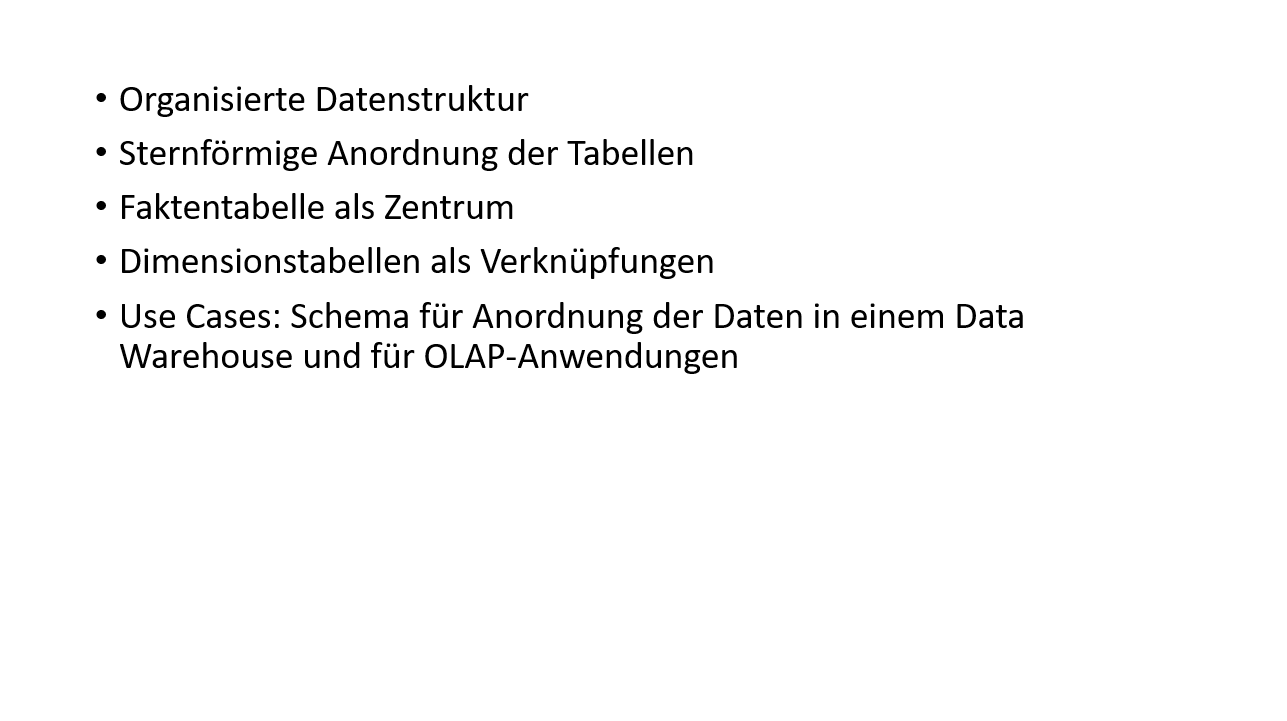

<h3>Faktentabelle</h3>

In einer Faktentabellen können bspw. Fakten, Metriken, Messwerte oder/und Kennzahlen enthalten sein. Jede Zeile bekommt seine eindeutige numerische Zuordnung: ein zusammengesetzter Schlüssel aus den Primärschlüsseln der Dimensionstabellen. Faktentabellen speichern ihre Daten nicht direkt, sonder verweisen über den foreign key auf Zeilen von verknüpften Dimensionstabellen. Sie können oft mehr als 10 Millionen Datensätze umfassen und werden in der 3. Normalfom gespeichert.

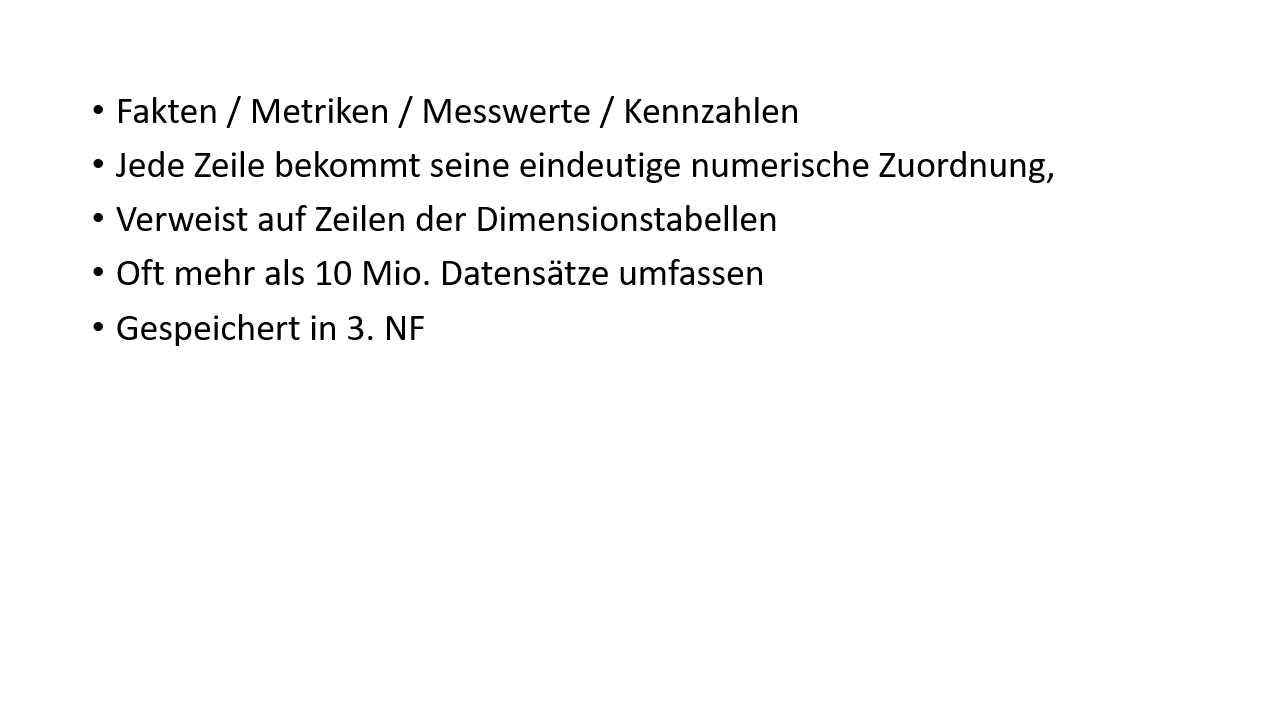

<h3>Dimensionstabellen</h3>

Dimensionstabellen enthalten die "beschreibenden" Daten, die Attribute bzw. Eigenschaften der Fakten. Sie sind vergleichsweiße statisch und erheblich kleiner als die Faktentabelle. Jede Zeile in einer Dimensionstabelle wird eindeutig identifiziert und als foreign key in der Faktentabelle gespeichert. Somit sind Fakten- und Dimensionstabelle über eine 1:n-Beziehung miteinander verknüpft. Der Name Dimensionstabelle kommt daher, da jede Dimensionstabelle in einem Sternschema eine Dimension des mehrdimensionalen OLAP-Würfels darstellt. Bei den Dimensionstabellen wird auf eine Normalisierung verzichtet, sie sind nur bis zur 2. Normalform optimiert.

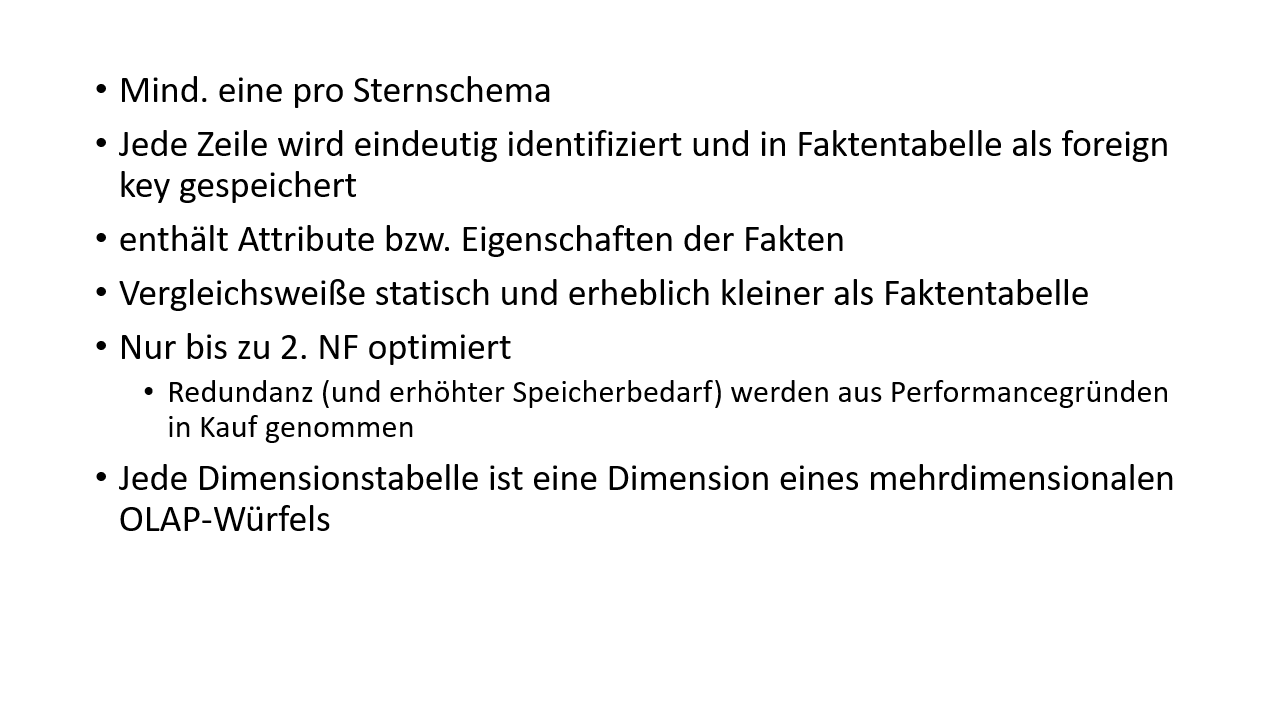

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/Starnschema_Aufbau.png width="750">

Quelle der obigen Abbildung: https://de.wikipedia.org/wiki/Sternschema

## Erstellen des Sternschemas

Zur Erinnerung sind in der folgenden Abbildung die Tabellen, die wir erhalten haben, dargestellt:

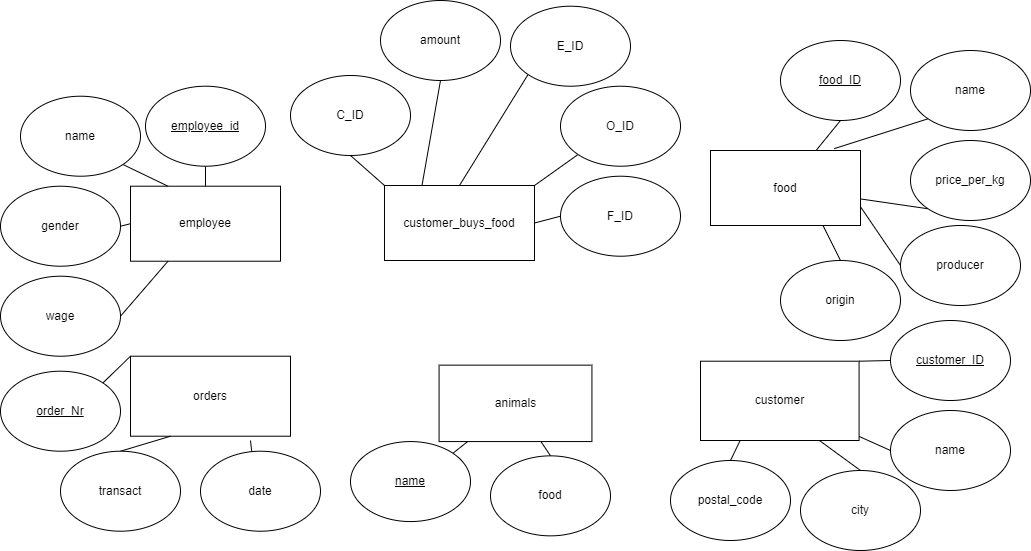

<h2> Joins </h2>

## INNER JOIN (Simple Join)

Der SQLite INNER JOIN gibt die Daten zurück, bei denen sich Tabelle Employee und Tabelle Order überschneiden.

Damit können wir alle Mitaebeiter finden, die mindestens eine Bestellung bearbeitet haben. 

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/innerjoin.png width="900">

## LEFT OUTER JOIN

LEFT OUTER JOIN gibt alle Zeilen aus der Tabelle Animals und nur die Zeilen aus der Tabelle Food zurück, bei denen die verknüpften Felder gleich sind.

Mit Left Join bekommen wir die Tabelle mit allen Tieren aus der Tabelle Animals und entsprechen Futter aus der Tabelle Food. Falls keine Futter zugewiesen wurde, steht in der erhaltenen Tabelle Null bei dem Futter. 

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/leftjoin.png width="900">
    


Für unsere Schterschema- Datenbank haben wir die Tabellen Food, Customer umd Employee übenommen. Die Tabelle Food wurde um das Tier aus der Tabelle Animals erweitern, da sie (Food und Animels) 1:1 Beziehing haben. Die Tabelle Order wird nicht mehr benötigt, alle Daten aus dieser Tabellen werden in die Faktentabelle übernommen. 


Die neuen Tabellen haben zusätzlische name new erhalten und wurden mit Daten aus der alten Tabellen befüllt:

In [ ]:
cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
conn.commit()


cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')

conn.commit()


cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin, animal)
                  SELECT food.food_ID, food.name, food.price_per_kg, food.producer, food.origin, animals.name
                  FROM food
                  INNER JOIN animals ON food.food_ID = animals.food;
                  ''')
conn.commit()
cursor.execute(''' SELECT * FROM food_new;''')
cursor.execute(''' PRAGMA table_info(food_new);''')
records = cursor.fetchall()

cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM employee_new;''')
records = cursor.fetchall()

    
    
cursor.execute(''' SELECT * FROM customer_new;''')
cursor.execute(''' PRAGMA table_info(customer_new);''')
records = cursor.fetchall()

    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM customer_new;''')
records = cursor.fetchall()

## Faktentabelle

Die Faktentabelle sales erhält alle Daten aus der Tabelle Order (order_Nr,transact, date). 
Customer_ID, employee_ID, food_ID werden als foreig key zu den Tabellen customer_new, employee_new, food_new referenziert. 

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
                  transact,
                  date DATE,
                  customer_id int, 
                  food_id INT,
                  amount INT,
                  employee_id INT,
                  foreign key(food_id) references food_new(food_id),
                  foreign key(customer_id) references customer_new(cust_id),
                  foreign key(employee_id) references employee_new(empl_id)
                  );''')

Für die Erstellung der Faktentabelle müssen wir die Tabelle Order, customer_buys_food und Food mit Join verbinden, um die Daten aus allen Tabellen in einer neueun Tabbelle zu laden. Die Faktentabelle sales wird mit dem Ergebnis befüllt.

In [ ]:
cursor.execute('''INSERT INTO sales( order_nr, transact, date, customer_id, food_id, amount,employee_id )
    SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID 
    FROM orders
    LEFT JOIN 
        customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN 
        food ON customer_buys_food.F_ID = food.food_ID;
    ''')

In [ ]:
cursor.execute(''' PRAGMA table_info(sales);''')
records = cursor.fetchall()

Das Schternschema, die wir erstellt haben:

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/Sternschema_DB.png width="1000">

## Inhalt der neuen Tabellen

## Inhalt der Faktentabelle

In [ ]:
print(pd.read_sql_query("SELECT * FROM sales", conn))

## Inhalt der Dimensionstabelle 

In [ ]:
print(pd.read_sql_query("SELECT * FROM employee_new", conn))

In [ ]:
print(pd.read_sql_query("SELECT * FROM food_new", conn))

### Beispiel: Wie viel Geld hat jeder Kunder ausgegeben?

In [ ]:
print(pd.read_sql_query('''
    SELECT customer_id, food_new.price_per_kg*amount as sum FROM sales
   INNER JOIN 
    food_new ON sales.food_id = food_new.food_id 
    GROUP BY customer_id
    ORDER by sum DESC
    ''', conn))

### Welcher Verkäufer hat am meisten Umsatz erwirtschaftet?

In [ ]:
print(pd.read_sql_query('''
    SELECT 
    employee_new.name as employee, sales.amount, food_new.price_per_kg,
    SUM(food_new.price_per_kg*sales.amount) as sum_sales
    FROM employee_new
    LEFT JOIN 
        sales ON employee_new.empl_id = sales.employee_id
    INNER JOIN 
        food_new ON sales.food_id = food_new.food_id
    GROUP BY employee_new.name
    ORDER BY sum_sales DESC
    ''', conn))

<h1>Übung 3</h1>

### Klicke auf den "*Open in Colab*" Button um die Übung durchzuführen
#### Aufgabe 3.1: Finde heraus welche Futter am meisten verkauft wurde.
#### Aufgabe 2.2: Finde heraus, welcher Verkäufer am häufigsten Bestellungen abgeschlossen hat.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuenfgeld/2022TeamBDataEngineeringBC/blob/main/Uebungen/Uebungen/Uebungen%20zu%20Teil%203.ipynb)